In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
coordinates

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [15]:
import requests
# requests.__version__

In [16]:
from Config import api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)
city_url = url + "&q=" + 'Boston'
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6b3b3f70dceaf748f16d2dac2b17ae4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6b3b3f70dceaf748f16d2dac2b17ae4&q=Boston


In [17]:
r = requests
city_weather = r.get(city_url)
# if city_weather.status_code == 200:
#     print(f"City Weather found.")
# else:
#     print(f"City weather not found.")
Boston_weather = city_weather.json()
Boston_weather['sys']
Boston_weather['dt']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1643284958,
 'sunset': 1643320268}

1643323898

In [18]:
import time
from datetime import datetime
import numpy as np
from citipy import citipy as cpy
date = Boston_weather['dt']
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-27 22:51:38'

In [19]:
latitudes = np.random.uniform(-90, 90, size=1500)
longitudes = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(latitudes, longitudes)
coordinates = list(lat_lngs)
cities = []
for coordinate in coordinates:
    city = cpy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
cities

['barbar',
 'biltine',
 'port alfred',
 'mangrol',
 'barretos',
 'vardo',
 'krasnyy',
 'camacha',
 'vikevag',
 'grindavik',
 'sorland',
 'naantali',
 'upernavik',
 'illoqqortoormiut',
 'marsabit',
 'jamestown',
 'carauari',
 'barra do garcas',
 'clyde river',
 'coquimbo',
 'amderma',
 'ushuaia',
 'bayji',
 'cape town',
 'plettenberg bay',
 'saint-philippe',
 'punta arenas',
 'anage',
 'chuy',
 'oksovskiy',
 'corinto',
 'kuopio',
 'ruhengeri',
 'maragogi',
 'victoria',
 'korla',
 'nantucket',
 'mehamn',
 'hermanus',
 'mahibadhoo',
 'paamiut',
 'brae',
 'iqaluit',
 'kirkcudbright',
 'loralai',
 'alta floresta',
 'port blair',
 'pedernales',
 'cartagena',
 'vila do maio',
 'bredasdorp',
 'nouakchott',
 'kavaratti',
 'petrozavodsk',
 'nuuk',
 'skalistyy',
 'emba',
 'saint-marc',
 'thompson',
 'aquiraz',
 'nizwa',
 'begun',
 'taolanaro',
 'lebu',
 'adrar',
 'terre haute',
 'east london',
 'busselton',
 'jujuy',
 'hithadhoo',
 'valkeala',
 'marcona',
 'marzuq',
 'ponta do sol',
 'sambava',
 

In [20]:
city_data = []
print('Beginning Data Retrieval')
print('------------------------')

record_count = 1
set_count = 1
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
# #         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# city_url
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
# #         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1

Beginning Data Retrieval
------------------------


In [21]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6b3b3f70dceaf748f16d2dac2b17ae4&q=Boston'

In [ ]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
#         time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
    except:
        print('City not found. Skipping...')
        pass
print('complete')

In [22]:
len(city_data)
city_data

0

[]

In [23]:
import pandas as pd
city_data_df = pd.DataFrame(city_data)
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
for columns in new_column_order:
    city_data_df = city_data_df[new_column_order]
# city_data_df.to_csv('World Weather Analysis/Weather Data/Cities_Weather.csv', index_label='City ID')

KeyError: "None of [Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',\n       'Cloudiness', 'Wind Speed'],\n      dtype='object')] are in the [columns]"

In [24]:
time.strftime('%x')

'01/27/22'

In [25]:
import matplotlib.pyplot as plt
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats, max_temps, edgecolor='black', linewidth=1, marker='o', alpha=0.7, label='Cities')
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.grid(True)


KeyError: 'Lat'

In [ ]:
plt.scatter(lats, humidity, edgecolor='black', linewidth=1, marker='o', alpha=0.7, label='Cities')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.grid(True)

In [ ]:
plt.scatter(lats, wind_speed, edgecolor='black', linewidth=1, marker='o', alpha=0.7, label='Cities')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

In [26]:
from scipy.stats import linregress
lats = [round(np.random.uniform(-90,90),1) for i in range(10)]
temps = [round(np.random.uniform(30,90),1) for i in range(10)]
lats
temps

[-1.1, -38.1, -88.2, 10.1, -13.2, -58.6, 78.3, 5.7, 29.7, 35.3]

[56.7, 88.3, 52.4, 51.9, 83.3, 71.2, 69.3, 49.5, 58.0, 84.3]

In [27]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
(slope, intercept, r_value, p_value, std_err)
equation = f'y = {round(slope,2)}'f'x + {round(intercept,2)}'
equation
print(f'The p-value is: {p_value:.3f}')

(0.01314519141980013,
 66.54271221759339,
 0.042954714955211755,
 0.9062097418345091,
 0.10809610605425642)

'y = 0.01x + 66.54'

The p-value is: 0.906


[66.52825250703161,
 66.041880424499,
 65.38330633436702,
 66.67547865093337,
 66.36919569085202,
 65.77240400039311,
 67.57198070576374,
 66.61763980868625,
 66.93312440276145,
 67.00673747471234]

Text(10, 40, 'y = 0.01x + 66.54')

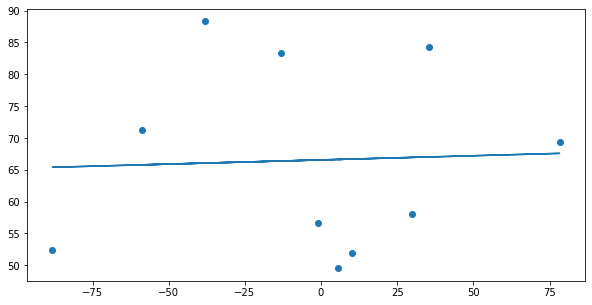

In [28]:
regress_values = [(lat*slope+intercept) for lat in lats]
regress_values
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(lats, temps)
ax.plot(lats, regress_values)
ax.annotate(equation, (10,40))


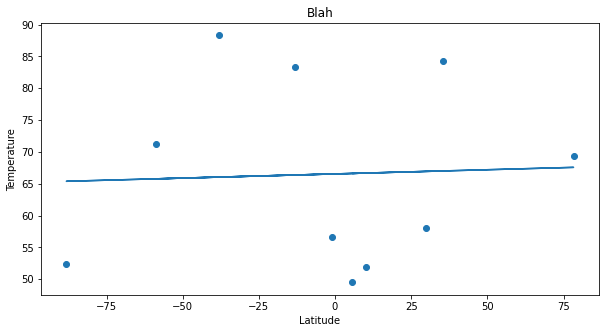

In [29]:
def plot_linregress(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = [(x * slope + intercept) for x in x_values]
    equation = f'y= {round(slope,2)}'f'x + {round(intercept,2)}'
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values)
    ax.annotate(equation, text_coordinates, fontsize=15, color='black')
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(y_label)
    plt.show()
plot_linregress(lats, temps, 'Blah', 'Temperature', (10,40))

In [59]:
city_data_df = pd.read_csv('World Weather Analysis/Weather Data/Cities_Weather.csv')
norhem_df = city_data_df[city_data_df['Lat'] >= 0]
sohem_df = city_data_df[city_data_df['Lat'] < 0]
norhem_df.head()
sohem_df.head()
city_data_df.head()

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Dembi Dolo,ET,2022-01-25 21:53:46,8.5333,34.8000,68.38,32,62,2.82
3,3,Czarnkow,PL,2022-01-25 21:53:46,52.9021,16.5641,40.55,94,77,8.79
4,4,Saint George,US,2022-01-25 21:48:46,37.1041,-113.5841,54.19,29,0,3.00
5,5,Verkhoshizhemye,RU,2022-01-25 21:53:46,58.0110,49.1038,5.09,93,92,7.00
7,7,Berlevag,NO,2022-01-25 21:50:15,70.8578,29.0864,28.40,93,75,31.07


,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Talara,PE,2022-01-25 21:53:45,-4.5772,-81.2719,74.16,73,100,11.21
1,1,Cape Town,ZA,2022-01-25 21:50:37,-33.9258,18.4232,68.41,76,0,7.00
6,6,Port Elizabeth,ZA,2022-01-25 21:50:46,-33.9180,25.5701,69.10,88,100,10.36
9,9,Lima,PE,2022-01-25 21:51:53,-12.0432,-77.0282,75.90,71,0,7.00
10,10,Mahebourg,MU,2022-01-25 21:50:22,-20.4081,57.7000,75.49,73,40,9.22


,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Talara,PE,2022-01-25 21:53:45,-4.5772,-81.2719,74.16,73,100,11.21
1,1,Cape Town,ZA,2022-01-25 21:50:37,-33.9258,18.4232,68.41,76,0,7.00
2,2,Dembi Dolo,ET,2022-01-25 21:53:46,8.5333,34.8000,68.38,32,62,2.82
3,3,Czarnkow,PL,2022-01-25 21:53:46,52.9021,16.5641,40.55,94,77,8.79
4,4,Saint George,US,2022-01-25 21:48:46,37.1041,-113.5841,54.19,29,0,3.00


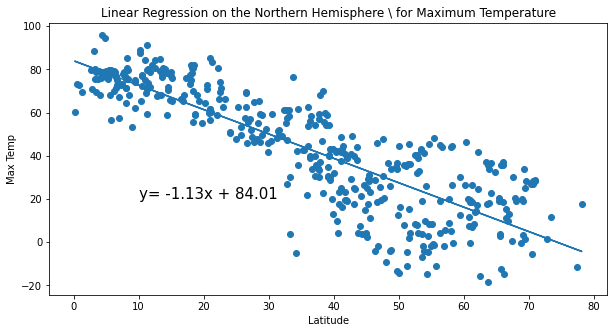

LinregressResult(slope=-1.1295108867543437, intercept=84.01076419071933, rvalue=-0.8419195939981352, pvalue=1.9193837624584998e-112, stderr=0.035665272901095064, intercept_stderr=1.4772344977882843)

In [141]:
x_values = norhem_df['Lat']
y_values = norhem_df['Max Temp']
plot_linregress(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,20))
linregress(x_values, y_values)

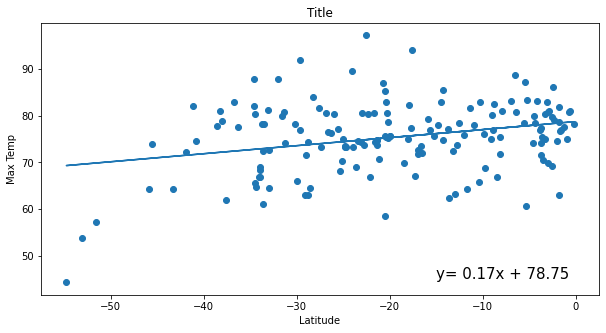

LinregressResult(slope=0.17218590722311414, intercept=78.74929967611276, rvalue=0.2896963247107473, pvalue=0.00017620936612907737, stderr=0.04483399527489909, intercept_stderr=1.0444912021234751)

In [34]:
x_values = sohem_df['Lat']
y_values = sohem_df['Max Temp']
plot_linregress(x_values, y_values, 'Title', 'Max Temp', (-15,45))
linregress(x_values, y_values)

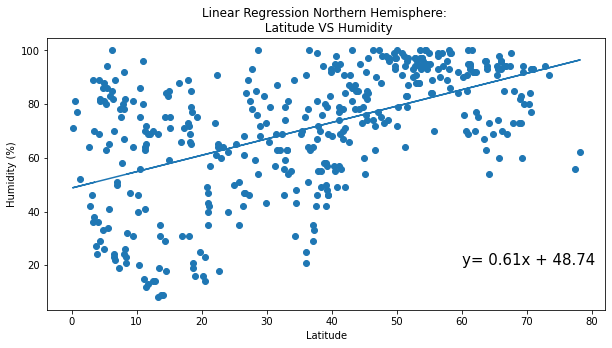

In [35]:
x_values = norhem_df['Lat']
y_values = norhem_df['Humidity']
plot_linregress(x_values, y_values, 'Linear Regression Northern Hemisphere: \n Latitude VS Humidity', 'Humidity (%)', (60,20))

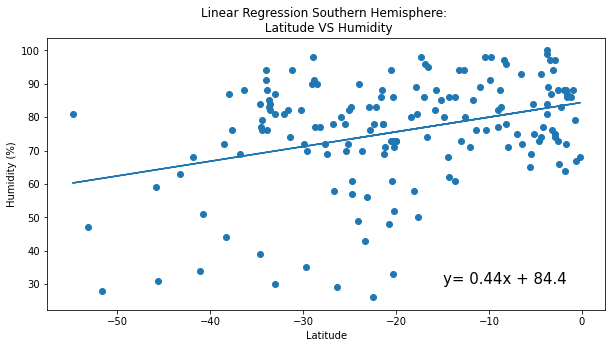

LinregressResult(slope=0.44015343189437345, intercept=84.40290962372833, rvalue=0.3505602737143799, pvalue=4.482716442261051e-06, stderr=0.09267335077743537, intercept_stderr=2.1589978534107304)

In [36]:
x_values = sohem_df['Lat']
y_values = sohem_df['Humidity']
plot_linregress(x_values, y_values, 'Linear Regression Southern Hemisphere: \n Latitude VS Humidity', 'Humidity (%)', (-15,30))
linregress(x_values, y_values)

In [91]:
import pandas as pd
import gmaps
from Config import gkey

gmaps.configure(api_key=gkey)

In [41]:
# df = gmaps.datasets.load_dataset_as_df('earthquakes')
# df.sort_values('magnitude', ascending=False)
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# fig = gmaps.figure().add_layer(gmaps.heatmap_layer(city_data_df[['Lat', 'Lng']], weights=temps))
fig = gmaps.figure()
locations = city_data_df[['Lat', 'Lng']]
heat_layer = gmaps.heatmap_layer(locations, weights=temps, max_intensity=25, point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# def gfigure_fun(locations, weights, max_intensity, point_radius):
#     fig = gmaps.figure(center=(30,31), zoom_level=1.5)
#     locations = locations
#     heat_layer = gmaps.heatmap_layer(locations, weights=weights, max_intensity=max_intensity, point_radius=point_radius)
#     fig.add_layer(heat_layer)
        
fig = gmaps.figure(center=(30,31), zoom_level=1.5)
locations = city_data_df[['Lat', 'Lng']]
weights = city_data_df['Humidity']
heat_layer = gmaps.heatmap_layer(locations, weights=weights,dissipating=False, max_intensity=300, point_radius=4.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
fig = gmaps.figure(center=(30,31), zoom_level=1.5)
locations = city_data_df[['Lat', 'Lng']]
weights = city_data_df['Cloudiness']
heat_layer = gmaps.heatmap_layer(locations, weights=weights,dissipating=False, max_intensity=300, point_radius=4.5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
min_temp = float(input('What is your minimum tolerable temperature?'))
max_temp = float(input('What is your maximum tolerable temperature?'))


What is your minimum tolerable temperature?60
What is your maximum tolerable temperature?90


City ID       False
City          False
Country        True
Date          False
Lat           False
Lng           False
Max Temp      False
Humidity      False
Cloudiness    False
Wind Speed    False
dtype: bool

In [71]:
preferred_cities_df = city_data_df.loc[(city_data_df['Max Temp'] >= min_temp)&(city_data_df['Max Temp'] <= max_temp)]
preferred_cities_df.isnull().any()

City ID       False
City          False
Country        True
Date          False
Lat           False
Lng           False
Max Temp      False
Humidity      False
Cloudiness    False
Wind Speed    False
dtype: bool

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Talara,PE,2022-01-25 21:53:45,-4.5772,-81.2719,74.16,73,100,11.21
1,1,Cape Town,ZA,2022-01-25 21:50:37,-33.9258,18.4232,68.41,76,0,7.00
2,2,Dembi Dolo,ET,2022-01-25 21:53:46,8.5333,34.8000,68.38,32,62,2.82
6,6,Port Elizabeth,ZA,2022-01-25 21:50:46,-33.9180,25.5701,69.10,88,100,10.36
9,9,Lima,PE,2022-01-25 21:51:53,-12.0432,-77.0282,75.90,71,0,7.00
...,...,...,...,...,...,...,...,...,...,...
570,570,Adrar,MR,2022-01-25 21:51:05,20.5022,-10.0711,70.75,14,100,8.66
571,571,Ambilobe,MG,2022-01-25 21:56:25,-13.2000,49.0500,72.34,94,95,2.57
572,572,Doha,QA,2022-01-25 21:51:32,25.2867,51.5333,62.49,65,0,3.44
574,574,Carnarvon,AU,2022-01-25 21:56:26,-24.8667,113.6333,73.47,83,0,14.97


In [76]:
preferred_cities_df = preferred_cities_df.dropna()
preferred_cities_df.isnull().any()
preferred_cities_df

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
570,False,False,False,False,False,False,False,False,False,False
571,False,False,False,False,False,False,False,False,False,False
572,False,False,False,False,False,False,False,False,False,False
574,False,False,False,False,False,False,False,False,False,False


,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Talara,PE,2022-01-25 21:53:45,-4.5772,-81.2719,74.16,73,100,11.21
1,1,Cape Town,ZA,2022-01-25 21:50:37,-33.9258,18.4232,68.41,76,0,7.00
2,2,Dembi Dolo,ET,2022-01-25 21:53:46,8.5333,34.8000,68.38,32,62,2.82
6,6,Port Elizabeth,ZA,2022-01-25 21:50:46,-33.9180,25.5701,69.10,88,100,10.36
9,9,Lima,PE,2022-01-25 21:51:53,-12.0432,-77.0282,75.90,71,0,7.00
...,...,...,...,...,...,...,...,...,...,...
570,570,Adrar,MR,2022-01-25 21:51:05,20.5022,-10.0711,70.75,14,100,8.66
571,571,Ambilobe,MG,2022-01-25 21:56:25,-13.2000,49.0500,72.34,94,95,2.57
572,572,Doha,QA,2022-01-25 21:51:32,25.2867,51.5333,62.49,65,0,3.44
574,574,Carnarvon,AU,2022-01-25 21:56:26,-24.8667,113.6333,73.47,83,0,14.97


In [75]:
hotel_df = preferred_cities_df[['City', 'Country', 'Max Temp', 'Lat', 'Lng', ]].copy()
hotel_df['Hotel Name'] = ''



,City,Country,Max Temp,Lat,Lng
0,Talara,PE,74.16,-4.5772,-81.2719
1,Cape Town,ZA,68.41,-33.9258,18.4232
2,Dembi Dolo,ET,68.38,8.5333,34.8000
6,Port Elizabeth,ZA,69.10,-33.9180,25.5701
9,Lima,PE,75.90,-12.0432,-77.0282
...,...,...,...,...,...
570,Adrar,MR,70.75,20.5022,-10.0711
571,Ambilobe,MG,72.34,-13.2000,49.0500
572,Doha,QA,62.49,25.2867,51.5333
574,Carnarvon,AU,73.47,-24.8667,113.6333


In [127]:
payload = {
    "radius": 5000,
    "type": "lodging",
    "key": gkey}
# hotels = requests.get('https://maps.googleapis.com/maps/api/place/nearbysearch/json', params=payload)
# hotels.json()
for i, row in hotel_df.iterrows():
    try:
        lat = row['Lat']
        lng = row['Lng']
        payload['location'] = f'{lat},{lng}'
        payload['location']
        base_url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json'
        hotels = requests.get(base_url, params=payload).json()
        hotel_df.loc[i,'Hotel Name'] = hotels['results'][0]['name']
    except IndexError:
        print('No hotel here')
        pass
hotel_df


'-4.5772,-81.2719'

'-33.9258,18.4232'

'8.5333,34.8'

'-33.918,25.5701'

'-12.0432,-77.0282'

'-20.4081,57.7'

'-38.0023,-57.5575'

'-25.4,-70.4833'

'-24.7911,-50.0119'

'-38.2667,141.9667'

'-2.9248,-39.9167'

'-0.7193,8.7815'

'0.5738,12.8642'

'8.3018,30.1418'

No hotel here


'21.2833,-88.2667'

'-26.8241,-65.2226'

'-20.2078,57.7625'

'17.0151,54.0924'

'-33.65,115.3333'

'13.2167,-59.5167'

'-21.3585,55.7679'

'11.6667,92.75'

'36.0397,-114.9819'

'-23.65,-70.4'

'15.1139,37.5928'

No hotel here


'-34.4187,19.2345'

'-3.6667,-45.38'

'10.9995,122.6711'

'5.3833,-52.95'

'-14.2667,50.1667'

'-0.6,73.0833'

'32.6667,-17.1'

'5.6667,73.0'

'14.8961,-24.4956'

'28.4682,-16.2546'

'-43.3002,-65.1023'

'6.9833,35.5833'

'-34.5322,20.0403'

'-4.4553,-43.8856'

'-33.6971,-53.4616'

'-13.6202,29.3939'

'4.9333,-52.3333'

'26.5412,-77.0636'

'3.0833,-59.95'

No hotel here


'5.4112,100.3354'

'-28.783,32.0377'

'-2.2717,40.902'

'-20.7511,-51.6783'

'-1.5746,9.2618'

'-21.6403,-41.0511'

'14.9167,120.55'

'4.95,23.9167'

No hotel here


'-30.1811,-50.2056'

'-33.5906,26.891'

'-31.393,-58.0209'

'-21.3393,55.4781'

'20.1986,1.0114'

No hotel here


'-2.4431,-54.7083'

'5.5079,10.6356'

'-18.4178,-46.4181'

'-16.5382,28.7088'

'18.0866,-67.1457'

'10.5669,72.642'

'22.6783,-3.9836'

No hotel here


'12.7667,-2.8833'

'-37.6167,-73.65'

'13.8065,-10.8321'

'-8.4192,20.7447'

'-32.035,-52.0986'

'-2.9506,12.7261'

'-17.7125,-39.2481'

'-36.777,-59.8585'

'-8.1642,-70.3536'

'4.2475,9.0047'

'-21.17,27.5079'

'-33.0153,27.9116'

'-33.0117,17.9442'

'5.2618,-0.759'

'8.1333,77.3'

'-33.5189,-53.3681'

'-29.9533,-71.3436'

'-34.4833,-54.3333'

'-22.9661,-42.0278'

'18.9048,-3.5265'

No hotel here


'-25.1667,45.05'

No hotel here


'3.2204,-76.3139'

'-3.7661,-49.6725'

'-28.9833,153.4167'

'-8.8368,13.2343'

'10.387,8.5726'

No hotel here


'22.2855,114.1577'

'18.4167,84.05'

'-20.3428,57.7575'

'7.9803,49.8164'

'-20.4711,-55.7872'

'0.15,29.2833'

'-19.9842,57.6142'

'-16.6228,-72.7111'

'5.3505,48.5268'

'11.4045,-69.6734'

'-13.7,-76.2167'

'12.0564,-61.7485'

'18.0858,-15.9785'

'11.2842,49.1816'

'-21.5394,-42.1803'

'-25.0333,46.3833'

'-31.6333,-60.7'

'14.35,121.0167'

'7.7669,-72.225'

'8.4109,20.6473'

No hotel here


'-1.7625,-48.8043'

'-7.9139,39.6668'

'4.8699,-2.2405'

'-1.95,18.2667'

'-34.6177,-68.3301'

'-16.92,35.262'

'13.4667,22.2'

No hotel here


'-9.0744,-44.3586'

'6.4965,2.6036'

'38.421,-121.4238'

'1.2313,34.2477'

'3.9366,41.867'

'-15.1961,12.1522'

'-27.4017,-51.225'

'34.5334,-82.6499'

'-21.3667,55.6167'

'9.49,76.3264'

'22.5667,59.5289'

'14.8,74.1333'

'-12.7406,-60.1458'

'-25.5333,-55.95'

'-20.0064,57.6608'

'33.072,-16.3415'

'11.5033,0.0572'

'33.7456,-117.8678'

'-5.5569,-80.8222'

'-34.0033,24.7314'

'-3.4833,23.4333'

No hotel here


'-20.1833,25.2333'

'-3.2778,-39.2689'

'22.1461,-80.4356'

'-15.8631,-38.8828'

'-10.3845,28.698'

'6.2262,-77.4044'

'-45.5752,-72.0662'

'-5.45,-42.3667'

'11.2833,-15.8333'

'-23.1041,26.8142'

'-2.5908,-51.9542'

'-6.9811,-34.8339'

'-45.8667,-67.5'

'-34.0527,23.3716'

'3.4568,8.5547'

No hotel here


'-4.1797,-38.1306'

'11.1,-2.1'

'-12.9896,-74.7205'

'-9.8756,-56.0861'

'7.3399,-2.3268'

'17.8333,82.95'

'-1.6633,-45.3717'

'6.1241,81.1185'

'-29.6643,17.8865'

'-14.4413,-67.5278'

'11.75,-2.9333'

'-28.7667,114.6'

'-11.7358,24.4293'

'-16.9478,-50.4486'

'-25.9653,32.5892'

'26.5733,50.0369'

'-20.3297,-40.2925'

'-22.8167,47.8333'

'26.452,-81.9481'

'11.472,49.8728'

No hotel here


'7.9986,124.2928'

'16.5833,82.0167'

'32.296,-81.2354'

'6.7085,121.9711'

'5.8808,-10.0467'

'4.375,-7.7169'

'-24.7,44.75'

'-14.3167,-67.3833'

No hotel here


'7.9178,98.3332'

'-5.1989,-35.4608'

'4.423,-7.3528'

'-17.8786,36.8883'

'-20.5167,57.5167'

'-9.7667,37.9333'

'-41.1456,-71.3082'

'17.8868,-77.5902'

'16.7833,80.85'

'-36.3132,-57.6792'

'4.95,-6.0833'

'7.4167,81.8167'

'4.1363,96.1285'

'-3.7703,-70.3831'

'14.5333,20.9167'

'2.6708,72.8944'

'-11.3847,43.2844'

'23.3167,88.65'

'8.0777,22.4007'

No hotel here


'17.3333,42.6667'

'-15.7167,46.3167'

'27.6753,-80.4092'

'-33.081,-68.4681'

'10.2511,-74.9146'

'-1.7656,-55.8661'

'-5.3,36.5667'

'12.5847,-81.7006'

'-24.0833,-55.5'

No hotel here


'18.4167,-64.6167'

'6.5423,21.9863'

'-27.6146,-48.5012'

'18.217,-63.0578'

'9.4092,45.064'

'6.3005,-10.7969'

'20.9524,72.9324'

'3.8093,43.2471'

'-3.8004,102.2655'

'12.485,-16.5469'

'13.35,-15.75'

No hotel here


'18.2342,-72.5347'

'10.4762,-66.5427'

'15.0584,43.2851'

'22.9333,57.5333'

'18.451,-78.1736'

'-1.8041,37.6203'

'-40.8135,-62.9967'

'-34.6534,-58.6198'

'20.9881,-77.4297'

'3.25,19.7667'

'-10.9492,-75.2261'

'13.5167,35.7667'

No hotel here


'37.9333,-121.3011'

'9.4942,50.8122'

'-0.2167,20.8667'

No hotel here


'20.9,70.3667'

'6.7297,-3.4964'

'-28.24,-48.6703'

'-2.8856,-40.12'

'20.5169,-13.0499'

'-3.1019,-60.025'

'10.1483,-85.452'

'3.9833,13.1833'

'-17.3019,31.3306'

'14.0,-11.0'

No hotel here


'-6.5742,-76.1367'

'7.5264,-12.505'

'8.0086,-62.3989'

'10.9878,-74.9547'

'14.4833,79.9833'

'0.8102,24.4336'

No hotel here


'-2.5447,14.7533'

'-8.1711,-79.0092'

'19.35,83.7833'

'-12.5763,13.4055'

'-38.5473,-58.7368'

'22.5206,-79.4669'

'-1.195,-46.02'

'-10.3353,-67.1856'

'-6.4333,39.55'

'-8.7619,-63.9039'

'-3.3167,17.3667'

'-26.3667,-70.05'

'-29.0642,30.5928'

'13.5691,33.5672'

'-22.3708,-41.7869'

'-23.4,21.7167'

No hotel here


'-9.0122,-35.2225'

'-41.8697,-73.8203'

'2.7739,27.616'

'-3.7481,-73.2472'

'8.25,34.5833'

'-0.95,-80.7333'

'-31.2503,-61.4867'

'21.1167,70.1167'

'-4.3878,-59.5939'

'-24.0058,-48.3494'

'6.4635,-2.3194'

'-14.7972,-57.2881'

'10.4396,45.0143'

'20.5022,-10.0711'

No hotel here


'-13.2,49.05'

'25.2867,51.5333'

'-24.8667,113.6333'

'3.4836,34.1492'

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Talara,PE,74.16,-4.5772,-81.2719,Hostal Oro Negro
1,Cape Town,ZA,68.41,-33.9258,18.4232,Southern Sun Waterfront Cape Town
2,Dembi Dolo,ET,68.38,8.5333,34.8000,Dembi dollo plaza
6,Port Elizabeth,ZA,69.10,-33.9180,25.5701,39 On Nile Guest House
9,Lima,PE,75.90,-12.0432,-77.0282,Gran Hotel Bolivar Lima
...,...,...,...,...,...,...
570,Adrar,MR,70.75,20.5022,-10.0711,NaN
571,Ambilobe,MG,72.34,-13.2000,49.0500,Hôtel & Restaurant DIANA Ambilobe
572,Doha,QA,62.49,25.2867,51.5333,Movenpick Hotel Doha
574,Carnarvon,AU,73.47,-24.8667,113.6333,Hospitality Carnarvon


In [131]:
info_box_template = """
<dl>
<dt>Location</dt><dd>{City}</dd>
<dt>Temperature</dt><dd>{Max Temp} °F</dd>
</dl>
"""
fig = gmaps.figure(center=(30,31), zoom_level=1.5)
locations = hotel_df[['Lat', 'Lng']]
weights = hotel_df['Max Temp']
heat_layer = gmaps.heatmap_layer(locations, weights=weights,dissipating=False, max_intensity=300, point_radius=4.5)
hotel_info = [info_box_template.format(**rows) for index, rows in hotel_df.iterrows()]
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig

SyntaxError: invalid syntax (Temp/ipykernel_10928/574655309.py, line 15)